In [1]:
# linear: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
# KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
# MLP: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

# we are predicting BIRTH WEIGHT (DBWT)

# Setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# CROP DOWN THE DATA FOR TESTING...
from numpy.random import RandomState
rng = RandomState()

train = pd.read_csv("../../data/us_births_train.csv").sample(frac=1, random_state=rng)
print(train.shape)
test = pd.read_csv("../../data/us_births_test.csv").sample(frac=1, random_state=rng)
print(test.shape)

(3041227, 16)
(760307, 16)


In [2]:
# Seperate test/train data into X and y (input and output)
X_train = train.drop('DBWT', axis=1) 
y_train = train['DBWT']
X_test = test.drop('DBWT', axis=1)
y_test = test['DBWT']

In [3]:
# TRAIN the model
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [4]:
# make predictions
y_pred = neigh.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
676493,2587,3676.5
429503,3657,2882.5
527938,3230,3465.0
231994,3660,3035.0
435663,2920,3344.5


Mean Absolute Error: 507.6235343091672
Mean Squared Error: 478273.6156115227
Root Mean Squared Error: 691.5732901229794


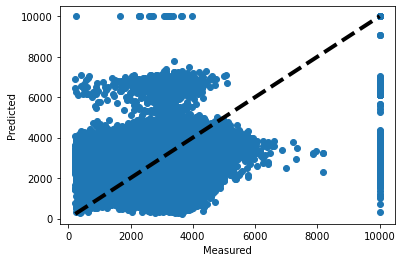

In [5]:
# get some metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# plot predictions vs expected
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()